Importing libraries

In [ ]:
!pip install kaggle
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#uploading kaggle json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhargavipoyekar","key":"38f277d7ef9194f0423f1b276d55d3f2"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d  bhargavipoyekar/emotionregulation
!kaggle datasets download -d  bhargavipoyekar/passiveviewing
!kaggle datasets download -d  bhargavipoyekar/resting2

 95% 234M/247M [00:06<00:00, 52.0MB/s]
100% 247M/247M [00:06<00:00, 41.1MB/s]
100% 212M/213M [00:13<00:00, 20.0MB/s]
100% 213M/213M [00:13<00:00, 16.1MB/s]
 99% 85.0M/86.2M [00:01<00:00, 50.0MB/s]
100% 86.2M/86.2M [00:01<00:00, 54.5MB/s]


In [ ]:
!unzip passiveviewing.zip
!unzip emotionregulation.zip
!unzip resting2.zip

Archive:  passiveviewing.zip
  inflating: PassiveViewing/s001_reduced.csv  
  inflating: PassiveViewing/s002_reduced.csv  
  inflating: PassiveViewing/s003_reduced.csv  
  inflating: PassiveViewing/s004_reduced.csv  
  inflating: PassiveViewing/s005_reduced.csv  
  inflating: PassiveViewing/s006_reduced.csv  
  inflating: PassiveViewing/s007_reduced.csv  
  inflating: PassiveViewing/s008_reduced.csv  
  inflating: PassiveViewing/s009_reduced.csv  
  inflating: PassiveViewing/s010_reduced.csv  
  inflating: PassiveViewing/s011_reduced.csv  
  inflating: PassiveViewing/s012_reduced.csv  
  inflating: PassiveViewing/s013_reduced.csv  
  inflating: PassiveViewing/s014_reduced.csv  
  inflating: PassiveViewing/s015_reduced.csv  
  inflating: PassiveViewing/s016_reduced.csv  
  inflating: PassiveViewing/s017_reduced.csv  
  inflating: PassiveViewing/s018_reduced.csv  
  inflating: PassiveViewing/s019_reduced.csv  
  inflating: PassiveViewing/s020_reduced.csv  
  inflating: PassiveViewing/s02

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.interpolate import interp1d
import math
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import welch
from datetime import datetime
import seaborn as sns

In [ ]:
PassiveViewing_Path= Path('/content/PassiveViewing')
EmotionRegulation_Path=Path('/content/EmotionRegulation')
Resting_Path=Path('/content/Resting')
# PassiveViewing_Path.sort()
# EmotionRegulation_Path.sort()
# Resting_Path.sort()

In [ ]:
Restingpaths = [
    filepath
    for filepath in Resting_Path.iterdir()
    if filepath.suffix == '.csv'
]
Emotionpaths=[
    filepath
    for filepath in EmotionRegulation_Path.iterdir()
    if filepath.suffix == '.csv'
]
Passivepaths=[
    filepath
    for filepath in PassiveViewing_Path.iterdir()
    if filepath.suffix == '.csv'
]

In [ ]:
resting_sample=pd.read_csv(Restingpaths[10])
resting_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77062 entries, 0 to 77061
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    77062 non-null  float64
 1   Raw F3  77062 non-null  float64
 2   Raw F4  77062 non-null  float64
 3   F3-Cz   77062 non-null  float64
 4   F4-Cz   77062 non-null  float64
 5   F3-CMA  77062 non-null  float64
 6   F4-CMA  77062 non-null  float64
dtypes: float64(7)
memory usage: 4.1 MB


Analyzing the Raw Data

In [ ]:
def make_plot(x,y,xlabel,ylabel,title):
  plt_1=plt.figure(figsize=(20,5))
  plt.plot(x,y)
  plt.xlim(0,10)
  plt.xlabel(xlabel)
  plt.xlabel(ylabel)
  plt.title(title)


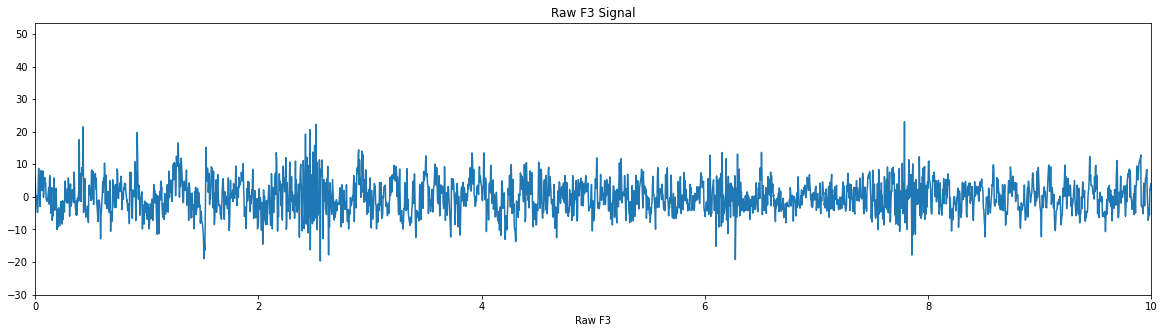

In [ ]:
y=resting_sample['Raw F3']
x=resting_sample['Time']
make_plot(x,y,'time','Raw F3','Raw F3 Signal')
plt.show()

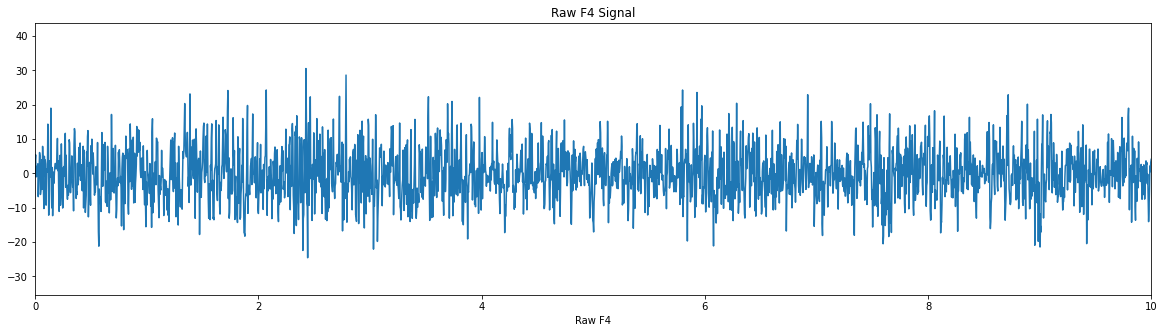

In [ ]:
y=resting_sample['Raw F4']
x=resting_sample['Time']
make_plot(x,y,'time','Raw F3','Raw F3 Signal')
plt.show()

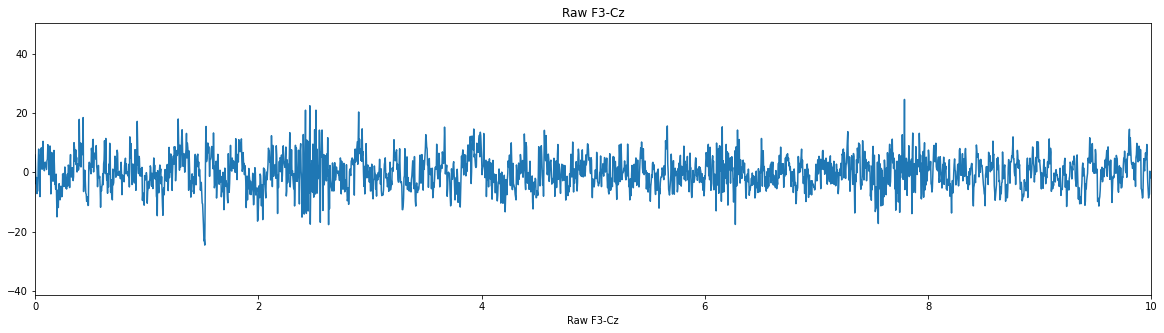

In [ ]:
y=resting_sample['F3-Cz']
x=resting_sample['Time']
plt_1=plt.figure(figsize=(20,5))
plt.plot(x,y)
plt.xlim(0,10)
plt.xlabel('time')
plt.xlabel('Raw F3-Cz')
plt.title('Raw F3-Cz')
plt.show()

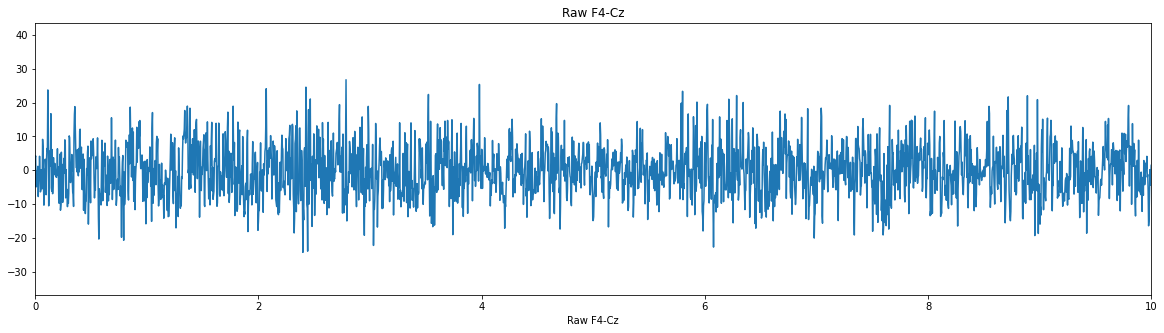

In [ ]:
y=resting_sample['F4-Cz']
x=resting_sample['Time']
plt_1=plt.figure(figsize=(20,5))
plt.plot(x,y)
plt.xlim(0,10)
plt.xlabel('time')
plt.xlabel('Raw F4-Cz')
plt.title('Raw F4-Cz')
plt.show()

In [47]:
dt = np.diff(resting_sample['Time']).min()
samp_rate = math.ceil(1 / dt)

rs_raw=np.array(resting_sample['Raw F3'])
rs_times=np.array(resting_sample['Time'])

f = interp1d(rs_times, rs_raw, kind='cubic')
rs_new_times = np.arange(rs_times[0], rs_times[-2], 1 / samp_rate)
raw_f3_inter = f(rs_new_times)

n=len(rs_new_times)

fhat = np.fft.fft(raw_f3_inter, n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.float(n/2), dtype = 'int')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


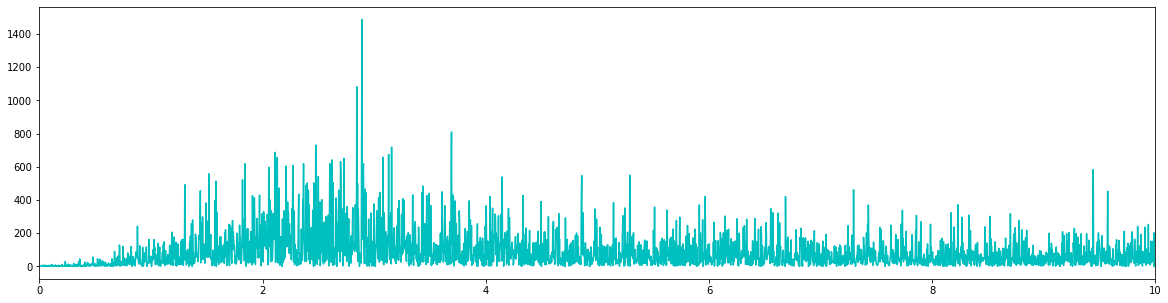

In [62]:
plt.figure(figsize = (20,5))
plt.plot(freq[L], PSD[L], color='c')
plt.xlim(0,10)
plt.show()

In [63]:
indices = PSD > 800
PSDClean = PSD * indices

In [64]:
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


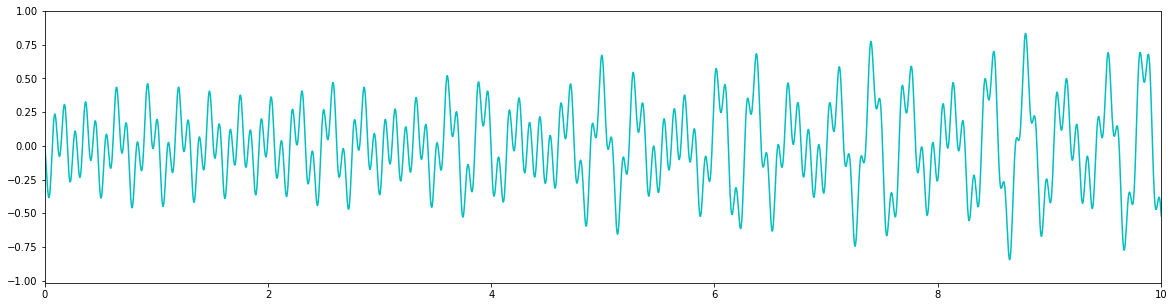

In [65]:
plt.figure(figsize = (20,5))
plt.plot(rs_new_times, ffilt, color='c')
plt.xlim(0,10)
plt.show()

In [66]:
detrend_f3=ffilt.copy()
ffilt[1:] = np.diff(ffilt)
detrend_f3[0]=detrend_f3[1]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


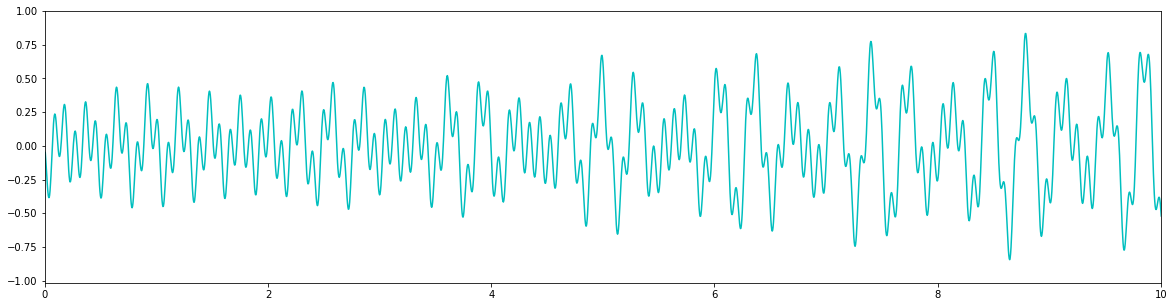

In [67]:
plt.figure(figsize = (20,5))
plt.plot(rs_new_times, detrend_f3, color='c')
plt.xlim(0,10)
plt.show()

In [ ]:
emotional_sample=pd.read_csv(Emotionpaths[10])
emotional_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220928 entries, 0 to 220927
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time      220928 non-null  float64
 1   Stimulus  220928 non-null  int64  
 2   Raw F3    220928 non-null  float64
 3   Raw F4    220928 non-null  float64
 4   F3-Cz     220928 non-null  float64
 5   F4-Cz     220928 non-null  float64
 6   F3-CMA    220928 non-null  float64
 7   F4-CMA    220928 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 13.5 MB


In [ ]:
for i in emotional_sample["Stimulus"]:
    if(int(i)>200 and int(i)<210):
      list1 = []
      list1 = i 
      print(emotional_sample[j])

KeyError: ignored

In [ ]:
image_rating = emotional_sample["Stimulus"]

In [ ]:
print()